In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import random
import timeit
from scipy.spatial import distance as dst
import itertools
import pickle
import scipy.stats as stats

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
import seaborn as sns
#sns.set_theme(style="whitegrid")
from scipy.stats.stats import spearmanr
from scipy.stats.stats import pearsonr
from scipy.stats import skew   
import networkx as nx
name_list = ['human_neuron','rat_neuron',
            'monkey_neuron','zebrafish_neuron',
    'vascular_2','vascular_3','vascular_1','mitochondrial','root_1','root_2','fruit_fly_2','fruit_fly_3','anthill','fruit_fly_4','fruit_fly_1']
color_dict = {'root_1':'green','root_2':'olive','mitochondrial':'y','vascular_1':'red','vascular_2':'crimson','vascular_3':'salmon',
              'fruit_fly_2':'purple','fruit_fly_3':'pink','tree':'brown','rat_neuron':'magenta','human_neuron':'indigo',
              'anthill':'silver','fruit_fly_1':'deeppink','fruit_fly_4':'plum','zebrafish_neuron':'blue','monkey_neuron':'teal'}

category_color_dict = {'root_1':'green','root_2':'green','mitochondrial':'blue','vascular_1':'b','vascular_2':'blue','vascular_3':'blue',
              'fruit_fly_2':'red','fruit_fly_3':'red','tree':'green','rat_neuron':'green','human_neuron':'green',
              'anthill':'green','fruit_fly_1':'red','fruit_fly_4':'red','zebrafish_neuron':'green','monkey_neuron':'green'}
name_change_dict = {'mitochondrial':'mitochon','human_neuron':'h_neuron','monkey_neuron':'m_neuron','rat_neuron':'r_neuron','zebrafish_neuron':'z_neuron'}
t_std = {}
t_1_distribution_dict = {}

In [34]:
path_source = '4. directed_metagraph_weights/'
name_mean_skew_dict = {}
name_mean_std_dict = {}
name_min_max_dict = {}
for name in name_list:
    infile = open(path_source +  name + "_weighted_results.pickle",'rb')
    intersection_metagraph = pickle.load(infile)
    metagraph_out_degree_weight_sum = intersection_metagraph['metagraph_out_degree_weight_sum']
    metagraph_in_degree_weight_sum = intersection_metagraph['metagraph_in_degree_weight_sum']
    connectome_out_degree_weight_sum = intersection_metagraph['connectome_out_degree_weight_sum']
    connectome_in_degree_weight_sum = intersection_metagraph['connectome_in_degree_weight_sum']
    
    meta_connectome_deg_diff = {}
    meta_weight_balance = {}
    for path_id in connectome_out_degree_weight_sum.keys():
        meta_connectome_deg_diff[path_id] = metagraph_out_degree_weight_sum[path_id] -  connectome_out_degree_weight_sum[path_id] + metagraph_in_degree_weight_sum[path_id] -  connectome_in_degree_weight_sum[path_id]
        meta_weight_balance[path_id] = (metagraph_out_degree_weight_sum[path_id] - metagraph_in_degree_weight_sum[path_id])/abs(metagraph_out_degree_weight_sum[path_id] + metagraph_in_degree_weight_sum[path_id])
    
    #mean_in_degree = np.std(list(diff_in_degree_weight_sum.values()))
   # mean_out_degree  = np.std(list(diff_out_degree_weight_sum.values()))
    #total_in_degree = np.sum(list(diff_in_degree_weight_sum.values()))
    #total_out_degree = np.sum(list(diff_in_degree_weight_sum.values()))
    
    mean_meta_connectome_diff = np.mean(list(meta_connectome_deg_diff.values()))
    median_meta_connectome_diff = np.median(list(meta_connectome_deg_diff.values()))
    std_meta_connectome_diff =  np.std(list(meta_connectome_deg_diff.values()))
    print(name, mean_meta_connectome_diff,median_meta_connectome_diff)
    skewness = stats.skew(list(meta_weight_balance.values()))
    name_mean_skew_dict[name] = [mean_meta_connectome_diff,skewness]
    name_mean_std_dict[name] = [mean_meta_connectome_diff, std_meta_connectome_diff ]

human_neuron 0.1594294770206022 0.0
rat_neuron 1.802162162162162 0.5499999999999998
monkey_neuron 0.6525974025974026 0.0
zebrafish_neuron 0.13452768729641693 0.0
vascular_2 1.821799844840962 0.4500000000000002
vascular_3 1.8288642186165673 0.5999999999999996
vascular_1 1.8538690476190474 0.4500000000000002
mitochondrial 0.21780821917808219 0.0
root_1 1.1880324543610548 0.15000000000000013
root_2 1.2615571776155718 0.09999999999999964
fruit_fly_2 6.078780570757196 1.4
fruit_fly_3 10.356724273528403 8.0
anthill 7.427580448326803 6.449999999999999
fruit_fly_4 6.192838066794934 2.2
fruit_fly_1 7.901214166262604 4.0


In [369]:
path_source_1 = '4. directed_metagraph_weights/'
path_source_2 = '../2. basic_measures/1. results_basic_properties/'
path_source_3 = '../3. abstract_network_results/1. network_measures_results/'
name_df = {}
corr_intersections_l_volume_dict = {'name':[],'spearman_correlation':[],'p_value':[]}
corr_intersections_l_cs_dict = {'name':[],'spearman_correlation':[],'p_value':[]}
corr_l_cs_volume_dict =  {'name':[],'spearman_correlation':[],'p_value':[]}
corr_l_cs_length_dict ={'name':[],'spearman_correlation':[],'p_value':[]}
corr_l_segments_cs_dict = {'name':[],'spearman_correlation':[],'p_value':[]}
corr_l_segments_volume_dict = {'name':[],'spearman_correlation':[],'p_value':[]}
corr_dict = {}
pval_dict = {}
link_name_dictionary = {}
corr_method = 'kendall'
#name_list = name_list
for name in name_list:
    print(name)
    infile = open(path_source_1 +  name + "_weighted_results.pickle",'rb')
    intersection_metagraph = pickle.load(infile)
    metagraph_out_degree_weight_sum = intersection_metagraph['metagraph_out_degree_weight_sum']
    metagraph_in_degree_weight_sum = intersection_metagraph['metagraph_in_degree_weight_sum']
    connectome_out_degree_weight_sum = intersection_metagraph['connectome_out_degree_weight_sum']
    connectome_in_degree_weight_sum = intersection_metagraph['connectome_in_degree_weight_sum']
    infile_2 = open(path_source_2 +  name + "_basic_results.pkl",'rb')
    basic_results = pickle.load(infile_2)
    meta_connectome_deg_diff = {}
    meta_weight_balance = {}
    for path_id in connectome_out_degree_weight_sum.keys():
        meta_connectome_deg_diff[path_id] = metagraph_out_degree_weight_sum[path_id] -  connectome_out_degree_weight_sum[path_id] + metagraph_in_degree_weight_sum[path_id] -  connectome_in_degree_weight_sum[path_id]
        meta_weight_balance[path_id] = (metagraph_out_degree_weight_sum[path_id] - metagraph_in_degree_weight_sum[path_id])/abs(metagraph_out_degree_weight_sum[path_id] + metagraph_in_degree_weight_sum[path_id])
    
    
    infile  = open(path_source_3 + "link_degree_betw.pkl",'rb')
    network_results = pickle.load(infile)
    link_dictionary = {'Complementary_straightness':[],'Link_volume':[], 'Link_confinement':[],'Link_degree' :[],'Link_betw':[],'Link_path_length':[],'Link_segments':[]}
    for path_id in connectome_out_degree_weight_sum.keys():
        link_dictionary['Complementary_straightness'].append(basic_results['c_straightness'][path_id])
        link_dictionary['Link_path_length'].append(basic_results['link_path_length'][path_id])
        link_dictionary['Link_volume'].append(basic_results['link_volume_normed'][path_id])
        link_dictionary['Link_confinement'].append( meta_connectome_deg_diff[path_id])
        link_dictionary['Link_degree'].append(network_results['link_degree'][name][path_id])
        link_dictionary['Link_betw'].append(network_results['link_betw'][name][path_id])
        link_dictionary['Link_segments'].append(basic_results['link_segments'][path_id])
    link_name_dictionary[name] = link_dictionary
    link_df= pd.DataFrame(link_dictionary)
    link_corr = link_df.corr().copy()
    skewness = stats.skew(list(meta_weight_balance.values()))
    mean_meta_connectome_diff = np.mean(list(meta_connectome_deg_diff.values()))
    if name in name_change_dict.keys():
        name = name_change_dict[name]
    network_dictionary = {'Name':[name],
                         'corr_intersections_l_volume' :[link_corr['Link_confinement']['Link_volume']],
                         'corr_intersections_c_straightness' :[link_corr['Link_confinement']['Complementary_straightness']]}
    name_df[name] = pd.DataFrame( network_dictionary).round(2)
    rho =link_df.corr(method=corr_method)
    pval = link_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    
    corr_dict[name] = rho
    pval_dict[name] = pval
        
    #Intersections and link volume
    corr_intersections_l_volume_dict['name'].append(name)
    corr_intersections_l_volume_dict['spearman_correlation'].append(rho['Link_confinement']['Link_volume'])
    corr_intersections_l_volume_dict['p_value'].append(np.round(pval['Link_confinement']['Link_volume'],4))

    #Intersections and link volume
    corr_intersections_l_cs_dict['name'].append(name)
    corr_intersections_l_cs_dict['spearman_correlation'].append(rho['Link_confinement']['Complementary_straightness'])
    corr_intersections_l_cs_dict['p_value'].append(np.round(pval['Link_confinement']['Complementary_straightness'],4))
    
    #Compl straightness and link volume
    
    corr_l_cs_volume_dict['name'].append(name)
    corr_l_cs_volume_dict['spearman_correlation'].append(rho['Link_volume']['Complementary_straightness'])
    corr_l_cs_volume_dict['p_value'].append(np.round(pval['Link_volume']['Complementary_straightness'],4))
    
    #Compl straightness and link path length
    corr_l_cs_length_dict['name'].append(name)
    corr_l_cs_length_dict['spearman_correlation'].append(rho['Link_path_length']['Complementary_straightness'])
    corr_l_cs_length_dict['p_value'].append(np.round(pval['Link_path_length']['Complementary_straightness'],4))
    
     #Compl straightness and segments per link
    corr_l_segments_cs_dict ['name'].append(name)
    corr_l_segments_cs_dict ['spearman_correlation'].append(rho['Link_segments']['Complementary_straightness'])
    corr_l_segments_cs_dict ['p_value'].append(np.round(pval['Link_segments']['Complementary_straightness'],4))    
        
        
    #Link volume and segments per link
    
    corr_l_segments_volume_dict ['name'].append(name)
    corr_l_segments_volume_dict ['spearman_correlation'].append(rho['Link_segments']['Link_volume'])
    corr_l_segments_volume_dict ['p_value'].append(np.round(pval['Link_segments']['Link_volume'],4))    
        

human_neuron
rat_neuron
monkey_neuron
zebrafish_neuron
vascular_2
vascular_3
vascular_1
mitochondrial
root_1
root_2
fruit_fly_2
fruit_fly_3
anthill
fruit_fly_4
fruit_fly_1


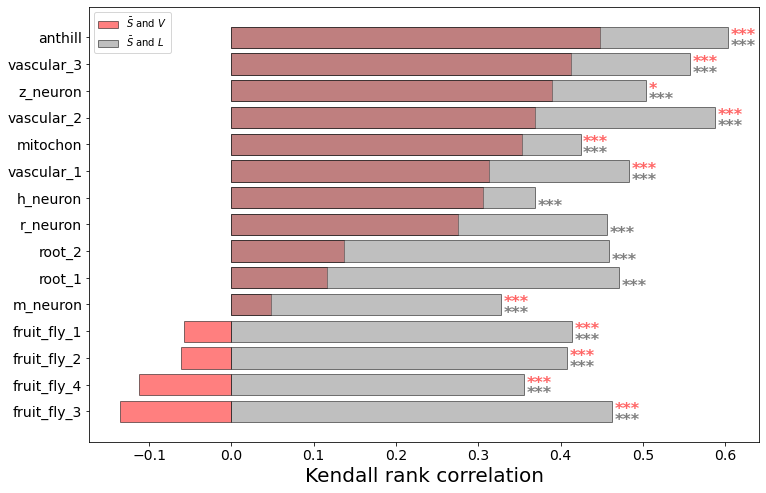

In [373]:
df_volume_cs = pd.DataFrame(corr_l_cs_volume_dict)
df_volume_cs = df_volume_cs.sort_values(by=['spearman_correlation'])

df_length_cs  = pd.DataFrame(corr_l_cs_length_dict )
df_length_cs = df_length_cs.reindex(index=df_volume_cs.index)
plt.figure(figsize=(12,8))
#plt.barh(df_volume_cs_non_sig['name'],df_volume_cs_non_sig['spearman_correlation'],alpha=0.5,edgecolor='black',orientation='horizontal',color='red',label='p >= 0.05')
#plt.xscale('log')
#plt.xticks([1000,10000,100000,1000000])
#plt.xlabel('Spearman correlation between link complementary straightness and link volume')
#plt.yticks(rotation = 45);
#plt.legend()
#plt.figure(figsize=(12,8))
ax_1 = plt.barh(df_volume_cs['name'],df_volume_cs['spearman_correlation'],alpha=0.5,edgecolor='black',orientation='horizontal',color='red',label=r'$\bar{S}$'+ ' and $V$')
ax_2 = plt.barh(df_length_cs['name'],df_length_cs['spearman_correlation'],alpha=0.5,edgecolor='black',orientation='horizontal',color='gray',label=r'$\bar{S}$'+ ' and $L$')
#plt.barh(df_volume_cs_non_sig['name'],df_volume_cs_non_sig['spearman_correlation'],alpha=0.5,edgecolor='black',orientation='horizontal',color='red',label='p >= 0.05')
#plt.xscale('log')
#plt.xticks([1000,10000,100000,1000000])
plt.xlabel('Kendall rank correlation')
#plt.yticks(rotation = 45);
plt.legend(loc='upper left')

for index,i in enumerate(ax_2.patches):
    p_value =  df_length_cs['p_value'].iloc[index]
    p_string = ''
    if p_value < 0.01:
        p_string = '***'
    elif p_value <0.05:
        p_string = '**'
    elif p_value <0.1:
        p_string = '*'
    plt.text(i.get_width()+0.003, i.get_y()- 0.1,
             p_string,
             fontsize=16, fontweight='bold',
             color='grey')
    
for index,i in enumerate(ax_2.patches):
    p_value =  df_volume_cs['p_value'].iloc[index]
    p_string = ''
    if p_value < 0.01:
        p_string = '***'
    elif p_value <0.05:
        p_string = '**'
    elif p_value <0.1:
        p_string = '*'
    plt.text(i.get_width()+0.003, i.get_y()+0.3,
            p_string,
             fontsize=16, fontweight='bold',
             color='red',alpha = 0.6)
plt.savefig('cs_corr.pdf', format='pdf',dpi=1200)

In [121]:
corr_tree = {}
pvalue_tree = {}
corr_lattice = {}
pvalue_lattice = {}
corr_tree_networks = {}
pvalue_tree_networks = {}
for name in name_list[:]:
    if ('vascular' in name) or ('mito' in name):
        corr_lattice[name] = corr_dict[name]
        pvalue_lattice[name] =  pval_dict[name] 
    elif ('fruit_fly' in name):
        corr_tree_networks[name] = corr_dict[name]
        pvalue_tree_networks[name] =  pval_dict[name] 
    else:
        corr_tree[name] = corr_dict[name]
        pvalue_tree[name] = pval_dict[name]

In [122]:
corrleation_profile_lattice = {}
correlation_p_values_lattice = {}
for network in corr_lattice.keys():
    corrleation_profile_lattice[network] = {}
    correlation_p_values_lattice[network] = {}
    for measure in corr_lattice[network ]['Link_confinement'].index:
        if measure != 'Link_confinement' and measure != 'Link_segments' and measure!='Link_path_length' :
            correlation_p_values_lattice[network][measure] = pvalue_lattice[network]['Link_confinement'][measure]
            p = correlation_p_values_lattice[network][measure] 
            corrleation_profile_lattice[network][measure] = corr_lattice[network]['Link_confinement'][measure]

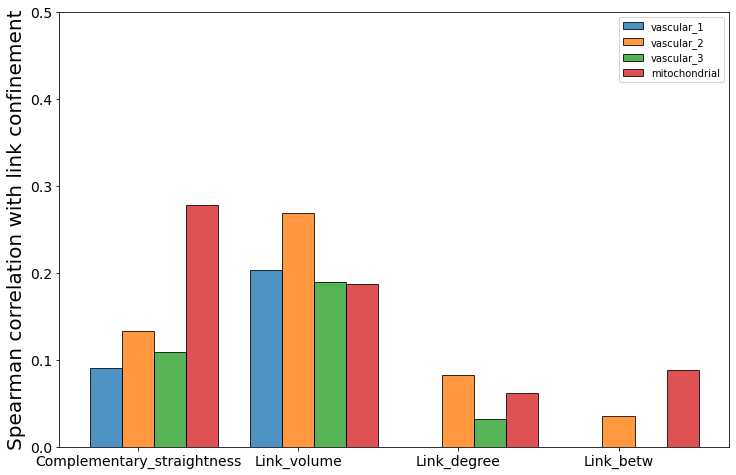

In [123]:
plt.figure(figsize=(12,8))
barWidth = 0.2
bars1 = list(corrleation_profile_lattice[network].keys())
r1 = np.arange(len(corrleation_profile_lattice['vascular_1'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1,corrleation_profile_lattice['vascular_1'].values(),width=barWidth,label='vascular_1',edgecolor='black',alpha=0.8)
plt.bar(r2,corrleation_profile_lattice['vascular_2'].values(),width=barWidth,label='vascular_2',edgecolor='black',alpha=0.8)
plt.bar(r3,corrleation_profile_lattice['vascular_3'].values(),width=barWidth,label='vascular_3',edgecolor='black',alpha=0.8)
plt.bar(r4,corrleation_profile_lattice['mitochondrial'].values(),width=barWidth,label='mitochondrial',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylabel('Spearman correlation with link confinement')
plt.ylim(0,0.5)
plt.savefig('corr_lattice.pdf', format='pdf',dpi=1200)


In [124]:
corrleation_profile_tree_networks = {}
correlation_p_values_tree_networks= {}
for network in corr_tree_networks.keys():
    corrleation_profile_tree_networks[network] = {}
    correlation_p_values_tree_networks[network] = {}
    for measure in corr_tree_networks[network ]['Link_confinement'].index:
        if measure != 'Link_confinement':
            correlation_p_values_tree_networks[network][measure] = pvalue_tree_networks[network]['Link_confinement'][measure]
            p = correlation_p_values_tree_networks[network][measure] 
            corrleation_profile_tree_networks[network][measure] = corr_tree_networks[network]['Link_confinement'][measure]

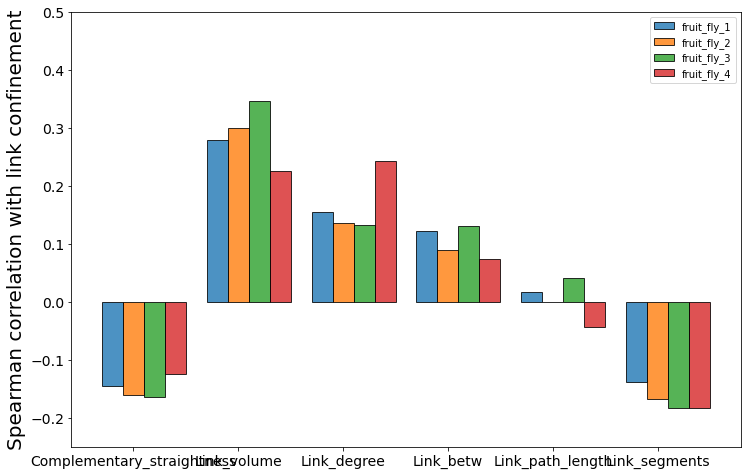

In [125]:
plt.figure(figsize=(12,8))
barWidth = 0.2
bars1 = list( corrleation_profile_tree_networks[network].keys())
r1 = np.arange(len(corrleation_profile_tree_networks['fruit_fly_2'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1, corrleation_profile_tree_networks['fruit_fly_1'].values(),width=barWidth,label='fruit_fly_1',edgecolor='black',alpha=0.8)
plt.bar(r2, corrleation_profile_tree_networks['fruit_fly_2'].values(),width=barWidth,label='fruit_fly_2',edgecolor='black',alpha=0.8)
plt.bar(r3, corrleation_profile_tree_networks['fruit_fly_3'].values(),width=barWidth,label='fruit_fly_3',edgecolor='black',alpha=0.8)
plt.bar(r4, corrleation_profile_tree_networks['fruit_fly_4'].values(),width=barWidth,label='fruit_fly_4',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.ylim(-0.25,0.5)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylabel('Spearman correlation with link confinement')
plt.savefig('corr_tree_networks.pdf', format='pdf',dpi=1200)


In [126]:
corrleation_profile_tree = {}
correlation_p_values_tree= {}
for network in corr_tree.keys():
    corrleation_profile_tree[network] = {}
    correlation_p_values_tree[network] = {}
    for measure in corr_tree[network]['Link_confinement'].index:
        if measure != 'Link_confinement':
            correlation_p_values_tree[network][measure] = pvalue_tree[network]['Link_confinement'][measure]
            p = correlation_p_values_tree[network][measure] 
            corrleation_profile_tree[network][measure] = corr_tree[network]['Link_confinement'][measure]

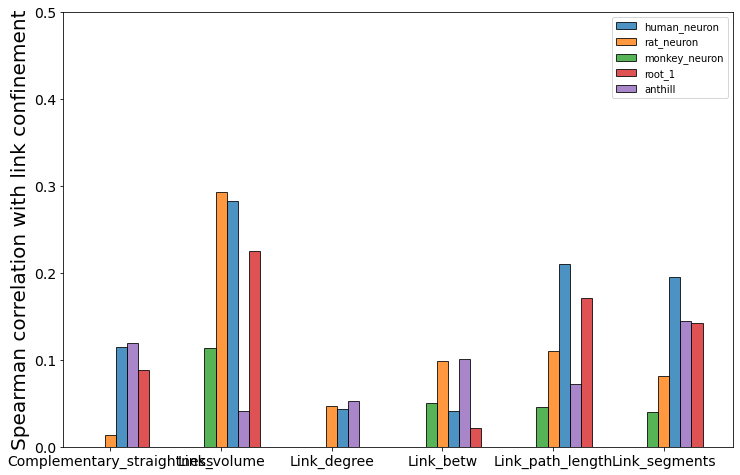

In [127]:
plt.figure(figsize=(12,8))
barWidth = 0.1
bars1 = list( corrleation_profile_tree[network].keys())
r1 = np.arange(len(corrleation_profile_tree['anthill'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r3, corrleation_profile_tree['human_neuron'].values(),width=barWidth,label='human_neuron',edgecolor='black',alpha=0.8)
plt.bar(r2, corrleation_profile_tree['rat_neuron'].values(),width=barWidth,label='rat_neuron',edgecolor='black',alpha=0.8)
plt.bar(r1, corrleation_profile_tree['monkey_neuron'].values(),width=barWidth,label='monkey_neuron',edgecolor='black',alpha=0.8)
#plt.bar(r4, corrleation_profile_tree['zebrafish_neuron'].values(),width=barWidth,label='zebrafish_neuron',edgecolor='black',alpha=0.8)
plt.bar(r5, corrleation_profile_tree['root_1'].values(),width=barWidth,label='root_1',edgecolor='black',alpha=0.8)
plt.bar(r4, corrleation_profile_tree['anthill'].values(),width=barWidth,label='anthill',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylim(0,0.5)
plt.ylabel('Spearman correlation with link confinement')
plt.savefig('corr_tree.pdf', format='pdf',dpi=1200)

Text(0, 0.5, 'Pearson correlation with link confinement')

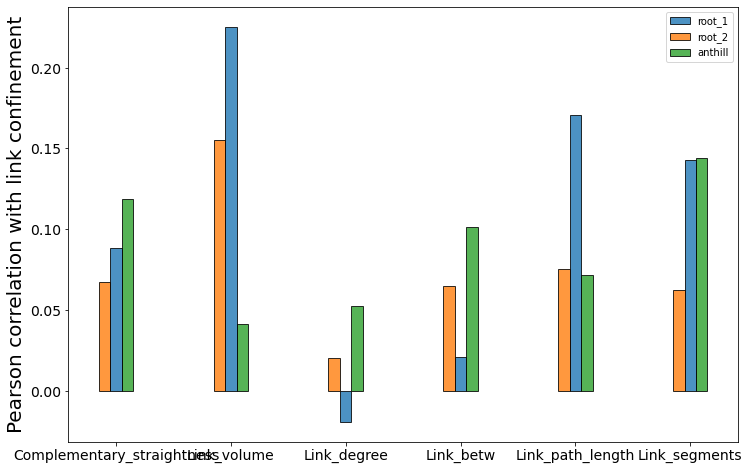

In [128]:
plt.figure(figsize=(12,8))
barWidth = 0.1
bars1 = list( corrleation_profile_tree[network].keys())
r1 = np.arange(len(corrleation_profile_tree['anthill'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.bar(r2, corrleation_profile_tree['root_1'].values(),width=barWidth,label='root_1',edgecolor='black',alpha=0.8)
plt.bar(r1, corrleation_profile_tree['root_2'].values(),width=barWidth,label='root_2',edgecolor='black',alpha=0.8)
plt.bar(r3, corrleation_profile_tree['anthill'].values(),width=barWidth,label='anthill',edgecolor='black',alpha=0.8)
#plt.bar(r4, corrleation_profile_tree['zebrafish_neuron'].values(),width=barWidth,label='zebrafish_neuron',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylabel('Pearson correlation with link confinement')

## Correlation profille

In [129]:
corrleation_profile_lattice = {}
correlation_p_values_lattice = {}
for network in corr_lattice.keys():
    corrleation_profile_lattice[network] = {}
    correlation_p_values_lattice[network] = {}
    for measure in corr_lattice[network ]['Link_confinement'].index:
        if measure != 'Link_confinement' and measure != 'Link_segments' and measure!='Link_path_length' :
            correlation_p_values_lattice[network][measure] = pvalue_lattice[network]['Link_confinement'][measure]
            p = correlation_p_values_lattice[network][measure] 
            corrleation_profile_lattice[network][measure] = np.round(corr_lattice[network]['Link_confinement'][measure],2)


In [130]:
correlation_profiles =  corrleation_profile_lattice
correlation_profiles_p = correlation_p_values_lattice
correlation_profiles.update( corrleation_profile_tree)
correlation_profiles.update( corrleation_profile_tree_networks)
correlation_profiles_p.update(correlation_p_values_tree)
correlation_profiles_p.update(correlation_p_values_tree_networks)


In [406]:
df_full = pd.DataFrame(correlation_profiles).transpose()
df_full = df_full.reindex(['vascular_1', 'vascular_2', 'vascular_3', 'mitochondrial',
       'human_neuron', 'rat_neuron', 'monkey_neuron', 'zebrafish_neuron',
       'root_1', 'root_2', 'anthill', 'fruit_fly_1', 'fruit_fly_2',
       'fruit_fly_3', 'fruit_fly_4'])
df_full.index = ['vascular_1', 'vascular_2', 'vascular_3', 'mitochon',
       'h_neuron', 'r_neuron', 'm_neuron', 'z_neuron',
       'root_1', 'root_2', 'anthill', 'fruit_fly_1', 'fruit_fly_2',
       'fruit_fly_3', 'fruit_fly_4']
df_full = df_full.iloc[:,:-2].copy().apply(lambda x:np.around(x,2))
df_full.columns = [r'$\bar{S}$', '$V$', '$d_{L}$',
       '$B$']
df_lattice = df_full.iloc[0:4,:]
df_tree = df_full.iloc[4:-4,:]
df_tree_network = df_full.iloc[-4:,:]
df_full

,$\bar{S}$,$V$,$d_{L}$,$B$
vascular_1,0.09,0.20,-0.02,-0.01
vascular_2,0.13,0.27,0.08,0.04
vascular_3,0.11,0.19,0.03,-0.00
mitochon,0.28,0.19,0.06,0.09
h_neuron,0.11,0.28,0.04,0.04
r_neuron,0.01,0.29,0.05,0.10
m_neuron,-0.08,0.11,-0.01,0.05
z_neuron,0.13,0.12,0.06,0.01
root_1,0.09,0.23,-0.02,0.02
root_2,0.07,0.16,0.02,0.07


In [407]:
df_p_full = pd.DataFrame(correlation_profiles_p).transpose()
df_p_full = df_p_full.iloc[:,:-2].copy().apply(lambda x:np.around(x,3))
df_p_full = df_p_full.reindex(['vascular_1', 'vascular_2', 'vascular_3', 'mitochondrial',
       'human_neuron', 'rat_neuron', 'monkey_neuron', 'zebrafish_neuron',
       'root_1', 'root_2', 'anthill', 'fruit_fly_1', 'fruit_fly_2',
       'fruit_fly_3', 'fruit_fly_4'])
df_p_full.index =  ['vascular_1', 'vascular_2', 'vascular_3', 'mitochon',
       'h_neuron', 'r_neuron', 'm_neuron', 'z_neuron',
       'root_1', 'root_2', 'anthill', 'fruit_fly_1', 'fruit_fly_2',
       'fruit_fly_3', 'fruit_fly_4']
df_p_full.columns = df_full.columns
p = df_p_full.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
df_full_sig = df_full.round(2).astype(str) + p
df_lattice_sig= df_full_sig .iloc[0:4,:]
df_tree_sig = df_full_sig .iloc[4:-4,:]
df_tree_network_sig = df_full_sig.iloc[-4:,:]
df_full_sig

,$\bar{S}$,$V$,$d_{L}$,$B$
vascular_1,0.09,0.2***,-0.02,-0.01
vascular_2,0.13***,0.27***,0.08***,0.04***
vascular_3,0.11***,0.19***,0.03*,-0.0
mitochon,0.28***,0.19**,0.06,0.09
h_neuron,0.11,0.28***,0.04***,0.04**
r_neuron,0.01,0.29***,0.05,0.1***
m_neuron,-0.08,0.11,-0.01,0.05***
z_neuron,0.13,0.12,0.06,0.01
root_1,0.09**,0.23***,-0.02,0.02***
root_2,0.07,0.16,0.02,0.07


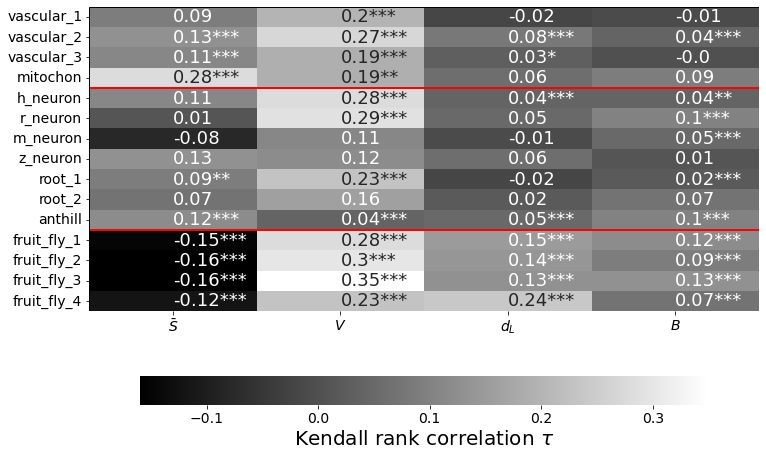

In [415]:
plt.figure(figsize=(12,8))
annot_kws = {"ha": 'left',"va": "center",'fontsize':18}
cbar_kws={'orientation': 'horizontal','use_gridspec':False,'location':"bottom",'label': 'Kendall rank correlation ' +  r'$\tau$',"shrink": 0.85}
#plt.title(corr_method + " correlation")
ax = sns.heatmap(df_full, annot=df_full_sig.values,fmt='',annot_kws=annot_kws,cbar_kws=cbar_kws,cmap='gray')
ax.hlines([4, 11], *ax.get_xlim(),colors='red',lw=2)
ax.hlines([0,15], *ax.get_xlim(),colors='black',lw=1)
ax.vlines([0,4], *ax.get_ylim(),colors='black',lw=1)
plt.savefig(corr_method + '_corr_heatmap.pdf', format='pdf',dpi=1200)

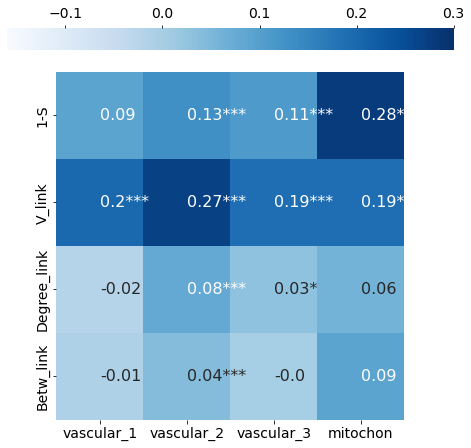

In [229]:
plt.figure(figsize=(8,8))
sns.heatmap(df_lattice.transpose(), annot=df_lattice_sig.transpose(),cmap='Blues',fmt='',annot_kws=annot_kws,vmin=-0.16,vmax=0.3,cbar_kws=cbar_kws,square=True)
#plt.title("Kendal tau correlation")
plt.savefig(corr_method +'_corr_lattice.pdf', format='pdf',dpi=1200)

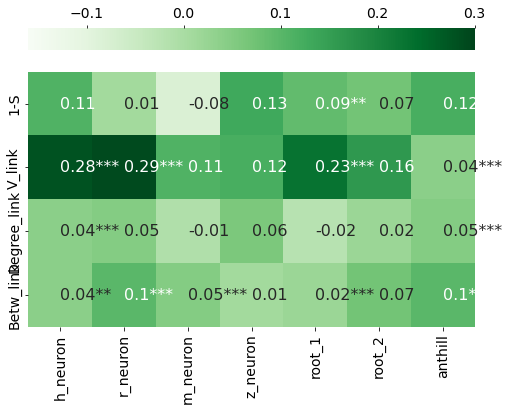

In [232]:
plt.figure(figsize=(8,8))
sns.heatmap(df_tree.transpose(), annot=df_tree_sig.transpose(),cmap='Greens',fmt='',annot_kws=annot_kws,vmin=-0.16,vmax=0.3,cbar_kws=cbar_kws,square=True)
#plt.title("Kendal tau correlation")
plt.yticks(rotation=90)
plt.savefig(corr_method+'_corr_tree.pdf', format='pdf',dpi=1200)

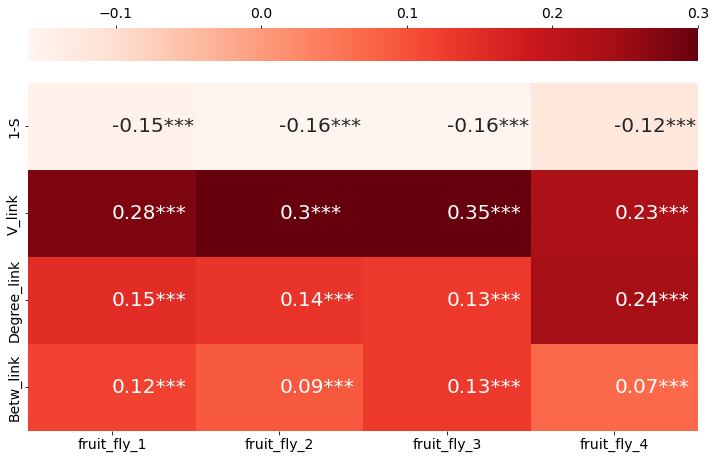

In [224]:
plt.figure(figsize=(12,8))
sns.heatmap(df_tree_network.transpose(), annot=df_tree_network_sig.transpose(),cmap='Reds',annot_kws=annot_kws,fmt='',vmin=-0.16,vmax=0.3,cbar_kws=cbar_kws)
#plt.title("Kendal tau correlation")
plt.savefig(corr_method+'_corr_tree_networks.pdf', format='pdf',dpi=1200)

## Link degree

In [216]:
corrleation_profile_lattice = {}
correlation_p_values_lattice = {}
for network in corr_lattice.keys():
    corrleation_profile_lattice[network] = {}
    correlation_p_values_lattice[network] = {}
    for measure in corr_lattice[network ]['Link_degree'].index:
        if measure != 'Link_degree':
            correlation_p_values_lattice[network][measure] = pvalue_lattice[network]['Link_degree'][measure]
            p = correlation_p_values_lattice[network][measure] 
            if p < 0.05:
                corrleation_profile_lattice[network][measure] = corr_lattice[network]['Link_degree'][measure]
            else:
                corrleation_profile_lattice[network][measure] = 0

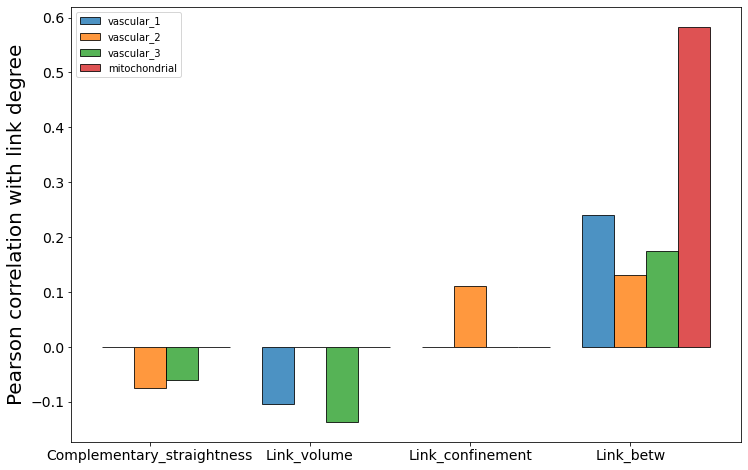

In [219]:
plt.figure(figsize=(12,8))
barWidth = 0.2
bars1 = list(corrleation_profile_lattice[network].keys())
r1 = np.arange(len(corrleation_profile['vascular_1'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1,corrleation_profile_lattice['vascular_1'].values(),width=barWidth,label='vascular_1',edgecolor='black',alpha=0.8)
plt.bar(r2,corrleation_profile_lattice['vascular_2'].values(),width=barWidth,label='vascular_2',edgecolor='black',alpha=0.8)
plt.bar(r3,corrleation_profile_lattice['vascular_3'].values(),width=barWidth,label='vascular_3',edgecolor='black',alpha=0.8)
plt.bar(r4,corrleation_profile_lattice['mitochondrial'].values(),width=barWidth,label='mitochondrial',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylabel('Pearson correlation with link degree')
plt.savefig('corr_lattice_link_degree.pdf', format='pdf',dpi=1200)

In [220]:
corrleation_profile_tree_networks = {}
correlation_p_values_tree_networks= {}
for network in corr_tree_networks.keys():
    corrleation_profile_tree_networks[network] = {}
    correlation_p_values_tree_networks[network] = {}
    for measure in corr_tree_networks[network ]['Link_degree'].index:
        if measure != 'Link_degree':
            correlation_p_values_tree_networks[network][measure] = pvalue_tree_networks[network]['Link_degree'][measure]
            p = correlation_p_values_tree_networks[network][measure] 
            if p < 0.05:
                corrleation_profile_tree_networks[network][measure] = corr_tree_networks[network]['Link_degree'][measure]
            else:
                corrleation_profile_tree_networks[network][measure] = 0

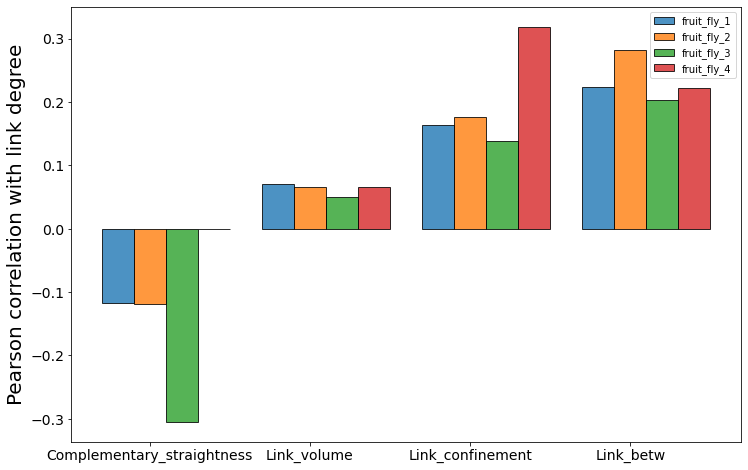

In [222]:
plt.figure(figsize=(12,8))
barWidth = 0.2
bars1 = list( corrleation_profile_tree_networks[network].keys())
r1 = np.arange(len(corrleation_profile_tree_networks['fruit_fly_2'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1, corrleation_profile_tree_networks['fruit_fly_1'].values(),width=barWidth,label='fruit_fly_1',edgecolor='black',alpha=0.8)
plt.bar(r2, corrleation_profile_tree_networks['fruit_fly_2'].values(),width=barWidth,label='fruit_fly_2',edgecolor='black',alpha=0.8)
plt.bar(r3, corrleation_profile_tree_networks['fruit_fly_3'].values(),width=barWidth,label='fruit_fly_3',edgecolor='black',alpha=0.8)
plt.bar(r4, corrleation_profile_tree_networks['fruit_fly_4'].values(),width=barWidth,label='fruit_fly_4',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylabel('Pearson correlation with link degree')
plt.savefig('corr_tree_networks_link_degree.pdf', format='pdf',dpi=1200)

In [245]:
corrleation_profile_tree = {}
correlation_p_values_tree= {}
for network in corr_tree.keys():
    corrleation_profile_tree[network] = {}
    correlation_p_values_tree[network] = {}
    for measure in corr_tree[network]['Link_degree'].index:
        if measure != 'Link_degree':
            correlation_p_values_tree[network][measure] = pvalue_tree[network]['Link_degree'][measure]
            p = correlation_p_values_tree[network][measure] 
            if p < 0.05:
                corrleation_profile_tree[network][measure] = corr_tree[network]['Link_degree'][measure]
            else:
                corrleation_profile_tree[network][measure] = 0

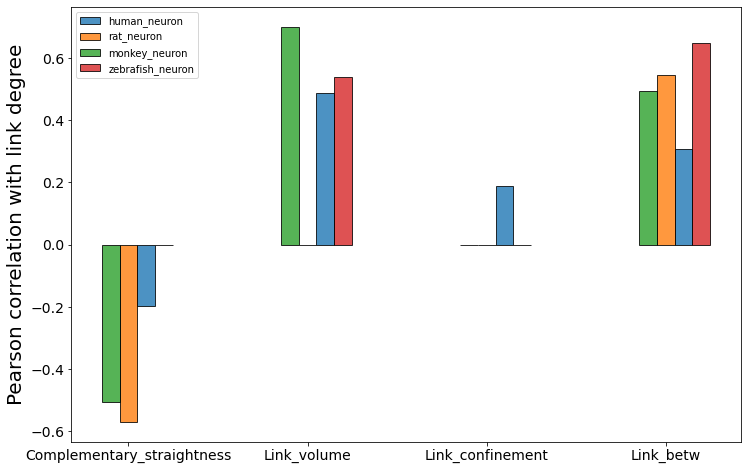

In [246]:
plt.figure(figsize=(12,8))
barWidth = 0.1
bars1 = list( corrleation_profile_tree[network].keys())
r1 = np.arange(len(corrleation_profile_tree['anthill'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r3, corrleation_profile_tree['human_neuron'].values(),width=barWidth,label='human_neuron',edgecolor='black',alpha=0.8)
plt.bar(r2, corrleation_profile_tree['rat_neuron'].values(),width=barWidth,label='rat_neuron',edgecolor='black',alpha=0.8)
plt.bar(r1, corrleation_profile_tree['monkey_neuron'].values(),width=barWidth,label='monkey_neuron',edgecolor='black',alpha=0.8)
plt.bar(r4, corrleation_profile_tree['zebrafish_neuron'].values(),width=barWidth,label='zebrafish_neuron',edgecolor='black',alpha=0.8)
#plt.bar(r4, corrleation_profile_tree['anthill'].values(),width=barWidth,label='anthill',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylabel('Pearson correlation with link degree')
plt.savefig('corr_tree_link_degree.pdf', format='pdf',dpi=1200)

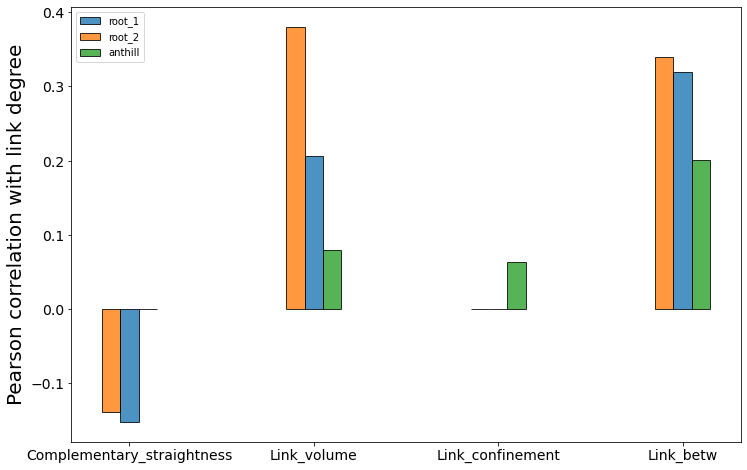

In [247]:
plt.figure(figsize=(12,8))
barWidth = 0.1
bars1 = list( corrleation_profile_tree[network].keys())
r1 = np.arange(len(corrleation_profile_tree['anthill'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.bar(r2, corrleation_profile_tree['root_1'].values(),width=barWidth,label='root_1',edgecolor='black',alpha=0.8)
plt.bar(r1, corrleation_profile_tree['root_2'].values(),width=barWidth,label='root_2',edgecolor='black',alpha=0.8)
plt.bar(r3, corrleation_profile_tree['anthill'].values(),width=barWidth,label='anthill',edgecolor='black',alpha=0.8)
#plt.bar(r4, corrleation_profile_tree['zebrafish_neuron'].values(),width=barWidth,label='zebrafish_neuron',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylabel('Pearson correlation with link degree')
plt.savefig('corr_tree_link_degree_2.pdf', format='pdf',dpi=1200)

## Betweennees centrality

In [229]:
corrleation_profile_lattice = {}
correlation_p_values_lattice = {}
for network in corr_lattice.keys():
    corrleation_profile_lattice[network] = {}
    correlation_p_values_lattice[network] = {}
    for measure in corr_lattice[network ]['Link_betw'].index:
        if measure != 'Link_betw':
            correlation_p_values_lattice[network][measure] = pvalue_lattice[network]['Link_betw'][measure]
            p = correlation_p_values_lattice[network][measure] 
            if p < 0.05:
                corrleation_profile_lattice[network][measure] = corr_lattice[network]['Link_betw'][measure]
            else:
                corrleation_profile_lattice[network][measure] = 0

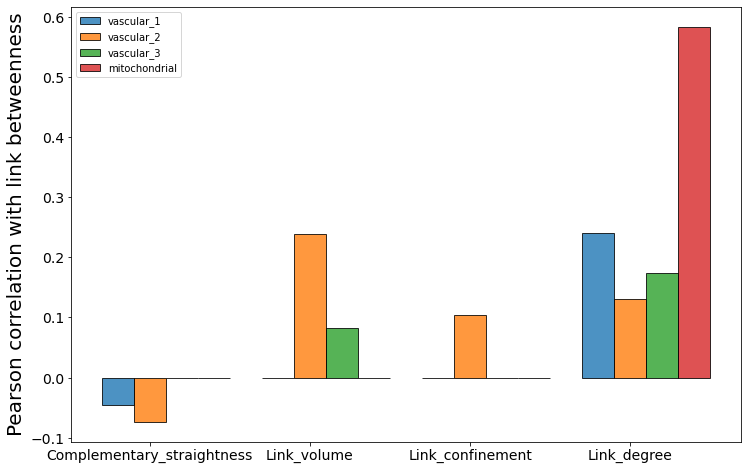

In [230]:
plt.figure(figsize=(12,8))
barWidth = 0.2
bars1 = list(corrleation_profile_lattice[network].keys())
r1 = np.arange(len(corrleation_profile['vascular_1'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1,corrleation_profile_lattice['vascular_1'].values(),width=barWidth,label='vascular_1',edgecolor='black',alpha=0.8)
plt.bar(r2,corrleation_profile_lattice['vascular_2'].values(),width=barWidth,label='vascular_2',edgecolor='black',alpha=0.8)
plt.bar(r3,corrleation_profile_lattice['vascular_3'].values(),width=barWidth,label='vascular_3',edgecolor='black',alpha=0.8)
plt.bar(r4,corrleation_profile_lattice['mitochondrial'].values(),width=barWidth,label='mitochondrial',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylabel('Pearson correlation with link betweenness')
plt.savefig('corr_lattice_link_betw.pdf', format='pdf',dpi=1200)

In [231]:
corrleation_profile_tree_networks = {}
correlation_p_values_tree_networks= {}
for network in corr_tree_networks.keys():
    corrleation_profile_tree_networks[network] = {}
    correlation_p_values_tree_networks[network] = {}
    for measure in corr_tree_networks[network ]['Link_betw'].index:
        if measure != 'Link_betw':
            correlation_p_values_tree_networks[network][measure] = pvalue_tree_networks[network]['Link_betw'][measure]
            p = correlation_p_values_tree_networks[network][measure] 
            if p < 0.05:
                corrleation_profile_tree_networks[network][measure] = corr_tree_networks[network]['Link_betw'][measure]
            else:
                corrleation_profile_tree_networks[network][measure] = 0

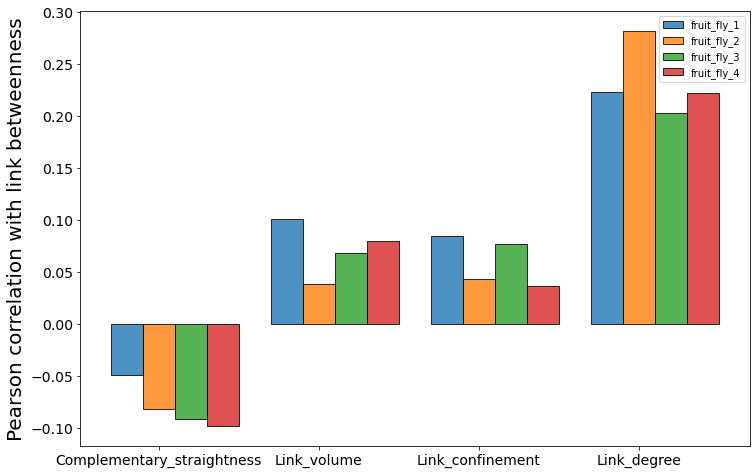

In [234]:
plt.figure(figsize=(12,8))
barWidth = 0.2
bars1 = list( corrleation_profile_tree_networks[network].keys())
r1 = np.arange(len(corrleation_profile_tree_networks['fruit_fly_2'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1, corrleation_profile_tree_networks['fruit_fly_1'].values(),width=barWidth,label='fruit_fly_1',edgecolor='black',alpha=0.8)
plt.bar(r2, corrleation_profile_tree_networks['fruit_fly_2'].values(),width=barWidth,label='fruit_fly_2',edgecolor='black',alpha=0.8)
plt.bar(r3, corrleation_profile_tree_networks['fruit_fly_3'].values(),width=barWidth,label='fruit_fly_3',edgecolor='black',alpha=0.8)
plt.bar(r4, corrleation_profile_tree_networks['fruit_fly_4'].values(),width=barWidth,label='fruit_fly_4',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylabel('Pearson correlation with link betweenness')
plt.savefig('corr_tree_networks_link_betw.pdf', format='pdf',dpi=1200)

In [235]:
corrleation_profile_tree = {}
correlation_p_values_tree= {}
for network in corr_tree.keys():
    corrleation_profile_tree[network] = {}
    correlation_p_values_tree[network] = {}
    for measure in corr_tree[network]['Link_betw'].index:
        if measure != 'Link_betw':
            correlation_p_values_tree[network][measure] = pvalue_tree[network]['Link_betw'][measure]
            p = correlation_p_values_tree[network][measure] 
            if p < 0.05:
                corrleation_profile_tree[network][measure] = corr_tree[network]['Link_betw'][measure]
            else:
                corrleation_profile_tree[network][measure] = 0

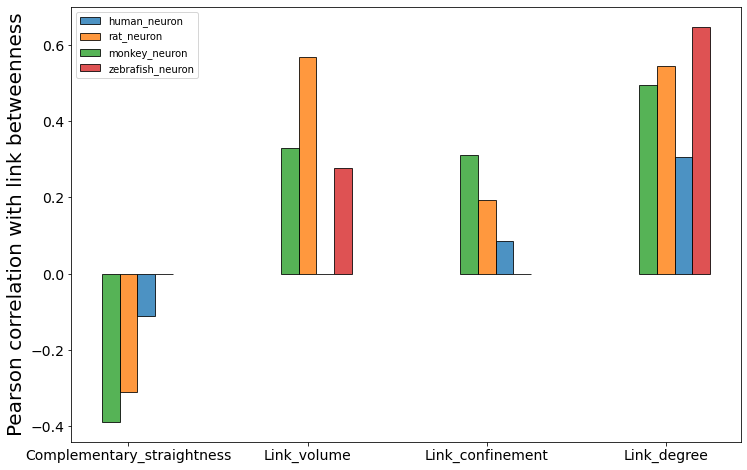

In [244]:
plt.figure(figsize=(12,8))
barWidth = 0.1
bars1 = list( corrleation_profile_tree[network].keys())
r1 = np.arange(len(corrleation_profile_tree['anthill'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r3, corrleation_profile_tree['human_neuron'].values(),width=barWidth,label='human_neuron',edgecolor='black',alpha=0.8)
plt.bar(r2, corrleation_profile_tree['rat_neuron'].values(),width=barWidth,label='rat_neuron',edgecolor='black',alpha=0.8)
plt.bar(r1, corrleation_profile_tree['monkey_neuron'].values(),width=barWidth,label='monkey_neuron',edgecolor='black',alpha=0.8)
plt.bar(r4, corrleation_profile_tree['zebrafish_neuron'].values(),width=barWidth,label='zebrafish_neuron',edgecolor='black',alpha=0.8)
#plt.bar(r4, corrleation_profile_tree['anthill'].values(),width=barWidth,label='anthill',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylabel('Pearson correlation with link betweenness')
plt.savefig('corr_tree_link_betw.pdf', format='pdf',dpi=1200)

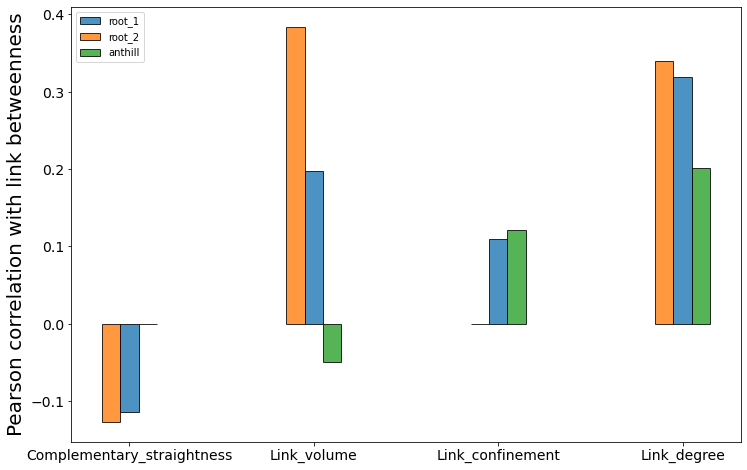

In [243]:
plt.figure(figsize=(12,8))
barWidth = 0.1
bars1 = list( corrleation_profile_tree[network].keys())
r1 = np.arange(len(corrleation_profile_tree['anthill'].keys()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.bar(r2, corrleation_profile_tree['root_1'].values(),width=barWidth,label='root_1',edgecolor='black',alpha=0.8)
plt.bar(r1, corrleation_profile_tree['root_2'].values(),width=barWidth,label='root_2',edgecolor='black',alpha=0.8)
plt.bar(r3, corrleation_profile_tree['anthill'].values(),width=barWidth,label='anthill',edgecolor='black',alpha=0.8)
#plt.bar(r4, corrleation_profile_tree['zebrafish_neuron'].values(),width=barWidth,label='zebrafish_neuron',edgecolor='black',alpha=0.8)
plt.legend()
#plt.xticks(rotation=45)
plt.xticks([r+barWidth for r in range(len(bars1))],bars1)
plt.ylabel('Pearson correlation with link betweenness')
plt.savefig('corr_tree_link_betw_2.pdf', format='pdf',dpi=1200)

## Compl straightness check

human_neuron
rat_neuron
monkey_neuron
zebrafish_neuron
vascular_2
vascular_3
vascular_1
mitochondrial
root_1
root_2
fruit_fly_2


/tmp/ipykernel_41327/1770932168.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


fruit_fly_3
anthill
fruit_fly_4
fruit_fly_1


<Figure size 864x576 with 0 Axes>

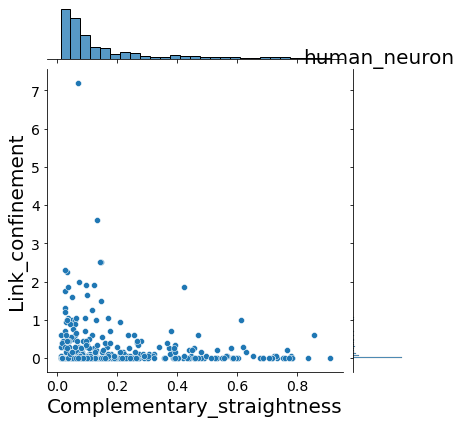

<Figure size 864x576 with 0 Axes>

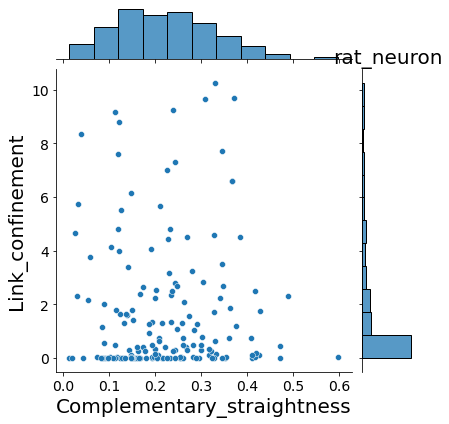

<Figure size 864x576 with 0 Axes>

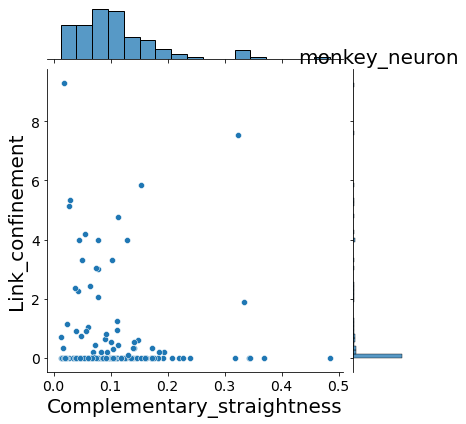

<Figure size 864x576 with 0 Axes>

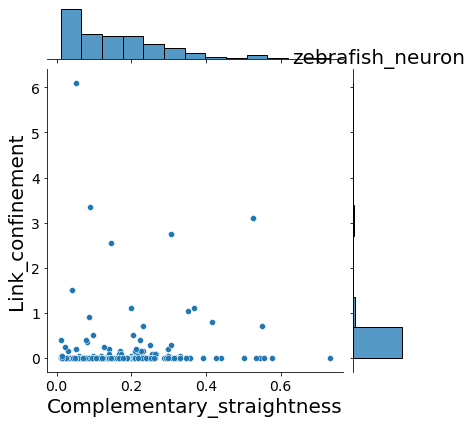

<Figure size 864x576 with 0 Axes>

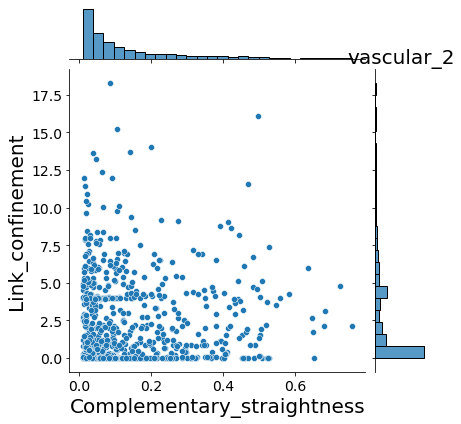

<Figure size 864x576 with 0 Axes>

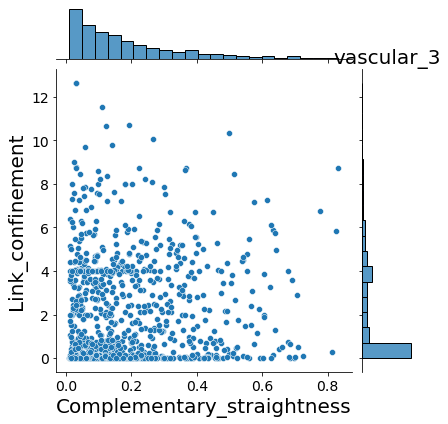

<Figure size 864x576 with 0 Axes>

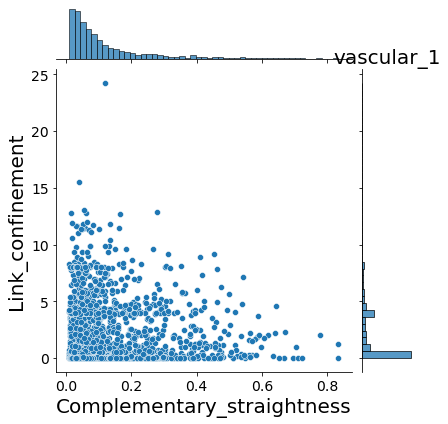

<Figure size 864x576 with 0 Axes>

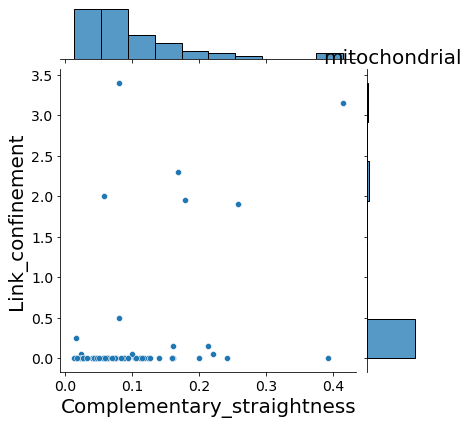

<Figure size 864x576 with 0 Axes>

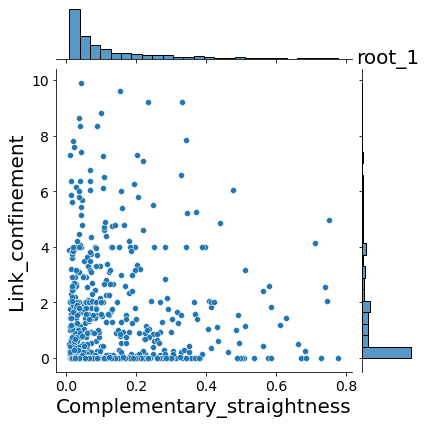

<Figure size 864x576 with 0 Axes>

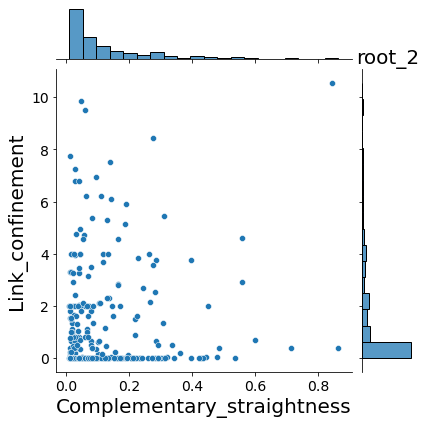

<Figure size 864x576 with 0 Axes>

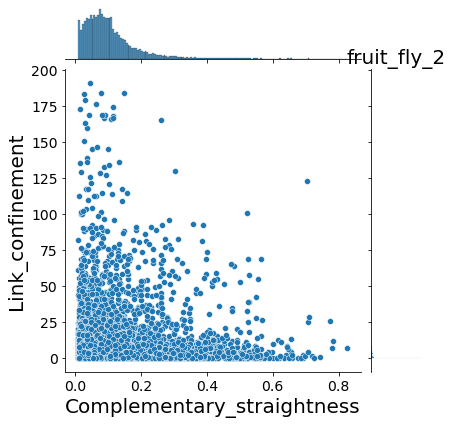

<Figure size 864x576 with 0 Axes>

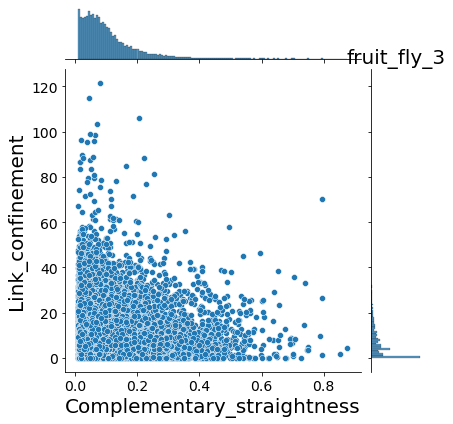

<Figure size 864x576 with 0 Axes>

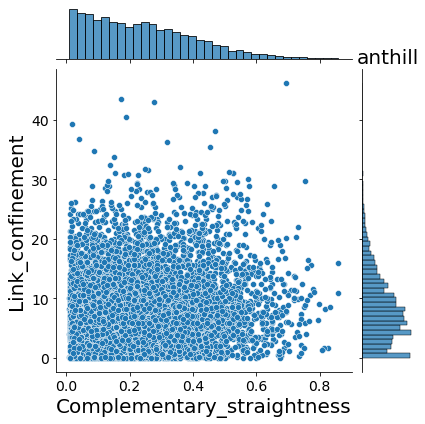

<Figure size 864x576 with 0 Axes>

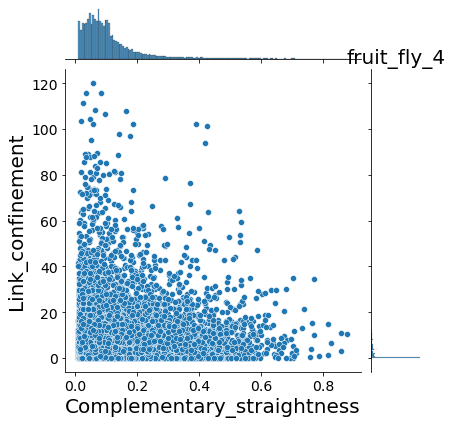

<Figure size 864x576 with 0 Axes>

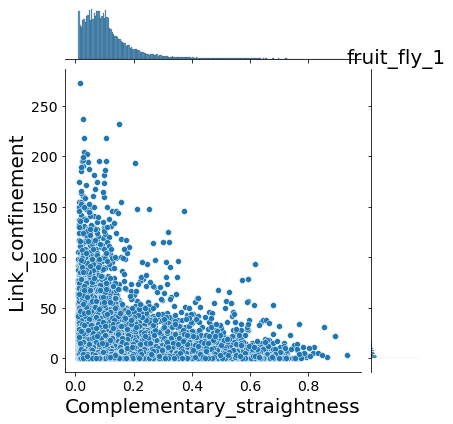

In [286]:
path_source_1 = '4. directed_metagraph_weights/'
path_source_2 = '../2. basic_measures/1. results_basic_properties/'
path_source_3 = '../3. abstract_network_results/1. network_measures_results/'
name_df = {}
corr_intersections_l_volume_dict = {'name':[],'pearson_correlation':[],'p_value':[]}
corr_intersections_l_cs_dict = {'name':[],'pearson_correlation':[],'p_value':[]}
corr_dict = {}
pval_dict = {}
link_name_dictionary = {}
ratio_dict = {}
for name in name_list:
    print(name)
    infile = open(path_source_1 +  name + "_weighted_results.pickle",'rb')
    intersection_metagraph = pickle.load(infile)
    metagraph_out_degree_weight_sum = intersection_metagraph['metagraph_out_degree_weight_sum']
    metagraph_in_degree_weight_sum = intersection_metagraph['metagraph_in_degree_weight_sum']
    connectome_out_degree_weight_sum = intersection_metagraph['connectome_out_degree_weight_sum']
    connectome_in_degree_weight_sum = intersection_metagraph['connectome_in_degree_weight_sum']
    infile_2 = open(path_source_2 +  name + "_basic_results.pkl",'rb')
    basic_results = pickle.load(infile_2)
    meta_connectome_deg_diff = {}
    meta_weight_balance = {}
    for path_id in connectome_out_degree_weight_sum.keys():
        meta_connectome_deg_diff[path_id] = metagraph_out_degree_weight_sum[path_id] -  connectome_out_degree_weight_sum[path_id] + metagraph_in_degree_weight_sum[path_id] -  connectome_in_degree_weight_sum[path_id]
        meta_weight_balance[path_id] = (metagraph_out_degree_weight_sum[path_id] - metagraph_in_degree_weight_sum[path_id])/abs(metagraph_out_degree_weight_sum[path_id] + metagraph_in_degree_weight_sum[path_id])
    
    
    infile  = open(path_source_3 + "link_degree_betw.pkl",'rb')
    network_results = pickle.load(infile)
    link_dictionary = {'Complementary_straightness':[], 'Link_confinement':[]}
    ratio_straight = 0
    for path_id in connectome_out_degree_weight_sum.keys():
        if basic_results['c_straightness'][path_id] > 0.01:
            link_dictionary['Complementary_straightness'].append(basic_results['c_straightness'][path_id])
            link_dictionary['Link_confinement'].append( meta_connectome_deg_diff[path_id])
        else:
            ratio_straight += 1
    ratio_dict[name] =  ratio_straight/len(list(connectome_out_degree_weight_sum.keys()))
    plt.figure(figsize=(12,8))
    data = pd.DataFrame({'Complementary_straightness':link_dictionary['Complementary_straightness'], 'Link_confinement':link_dictionary['Link_confinement']})
    sns.jointplot(data=data, x="Complementary_straightness", y='Link_confinement')
    plt.title(name)
    plt.ylabel('Link confinement')
    plt.xlabel("Complementary straightness")
    
    x = link_dictionary['Complementary_straightness']
    y = link_dictionary['Link_confinement']
    rho =data.corr(method='pearson')
    pval =data.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)

    corr_dict[name] = rho['Complementary_straightness']['Link_confinement']
    pval_dict[name] = pval['Complementary_straightness']['Link_confinement']

human_neuron
rat_neuron
monkey_neuron
zebrafish_neuron
vascular_2
vascular_3
vascular_1
mitochondrial
root_1
root_2
fruit_fly_2
fruit_fly_3
anthill
fruit_fly_4
fruit_fly_1
human_neuron
rat_neuron
monkey_neuron
zebrafish_neuron
vascular_2
vascular_3
vascular_1
mitochondrial
root_1
root_2
fruit_fly_2
fruit_fly_3
anthill
fruit_fly_4
fruit_fly_1


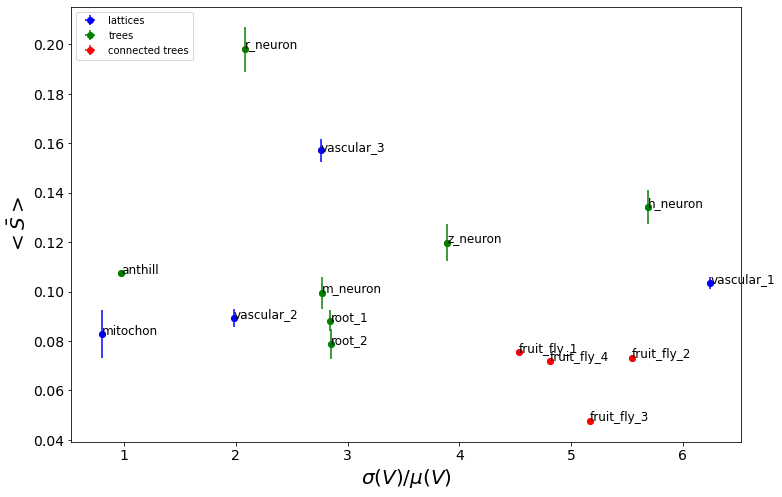

In [423]:
plot_dict = {}
plot_std_dict = {}
for name in link_name_dictionary.keys():
    plot_dict[name] = (np.std(list(link_name_dictionary[name]['Link_volume']))/np.mean(list(link_name_dictionary[name]['Link_volume'])), np.mean(list(link_name_dictionary[name]['Complementary_straightness'])))
    plot_std_dict[name] = (0, 
                                  np.std(list(link_name_dictionary[name]['Complementary_straightness']))/np.sqrt(len(link_name_dictionary[name]['Complementary_straightness'])))
#plt.scatter(x,y)
name_change_dict = {'zebrafish_neuron':'z_neuron','human_neuron':'h_neuron','monkey_neuron':'m_neuron','mitochondrial':'mitochon','rat_neuron':'r_neuron'}

plt.figure(figsize=(12,8))
for name in plot_dict.keys():
    print(name)
    x = plot_dict[name][0]
    y = plot_dict[name][1]
    plt.scatter(x, y)
    if name in name_change_dict.keys():
        name = name_change_dict[name]
   # plt.scatter(x, y)
    plt.text(x,y, name, fontsize=12)
        
l_x = []
l_y = []
l_x_error = []
l_y_error = []
t_x = []
t_y = []
t_x_error = []
t_y_error = []
cn_x = []
cn_y = []
cn_x_error = []
cn_y_error = []
for name in plot_dict.keys():
    print(name)
    x = plot_dict[name][0]
    y = plot_dict[name][1]
    x_error = plot_std_dict[name][0] 
    y_error = plot_std_dict[name][1] 
    if 'vascular' in name or 'mito' in name:
        l_x.append(x)
        l_y.append(y)
        l_x_error.append( x_error )
        l_y_error.append( y_error )
    elif 'fruit_fly' in name:
        cn_x.append(x)
        cn_y.append(y)
        cn_x_error.append( x_error )
        cn_y_error.append(y_error)
    else:
        t_x.append(x)
        t_y.append(y)
        t_x_error.append( x_error )
        t_y_error.append(y_error)
#plt.scatter(l_x,l_y,label='lattice',color='blue')
plt.errorbar(l_x, l_y, xerr = l_x_error, yerr= l_y_error, fmt="o",color='blue',label='lattices')
plt.errorbar(t_x, t_y, xerr = t_x_error, yerr= t_y_error, fmt="o",color='green',label='trees')
plt.errorbar(cn_x, cn_y, xerr = cn_x_error, yerr= cn_y_error, fmt="o",color='red',label='connected trees')
#plt.scatter(t_x,t_y,label='tree',color='green')
#plt.scatter(cn_x,cn_y,label='tree-network',color='red')
#plt.xscale('log')
plt.ylabel(r'$<\bar{S}>$')
plt.xlabel(r'$\sigma (V)  /  \mu (V)$')
plt.legend(loc ='upper left')
plt.savefig('link_cs_volume.pdf', format='pdf',dpi=1200)